## The time series is downloaded from TSDL.

In [1]:
milk<-read.csv('monthly-milk-production-pounds-p.csv')
Milk<-milk$Pounds

initial  value 1.960071 
iter   2 value 1.820277
iter   3 value 1.808696
iter   4 value 1.803385
iter   5 value 1.802687
iter   6 value 1.800218
iter   7 value 1.800130
iter   8 value 1.800128
iter   9 value 1.800127
iter   9 value 1.800127
iter   9 value 1.800127
final  value 1.800127 
converged
initial  value 1.797249 
iter   2 value 1.795522
iter   3 value 1.795498
iter   4 value 1.795498
iter   4 value 1.795498
final  value 1.795498 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
         sma1
      -0.6750
s.e.   0.0752

sigma^2 estimated as 34.47:  log likelihood = -459.66,  aic = 923.33

$degrees_of_freedom
[1] 155

$ttable
     Estimate     SE t.value p.value
sma1   -0.675 0.0752 -8.9785       0

$AIC
[1] 4.552789

$AICc
[1] 4.566113

$BIC
[1] 3.57234


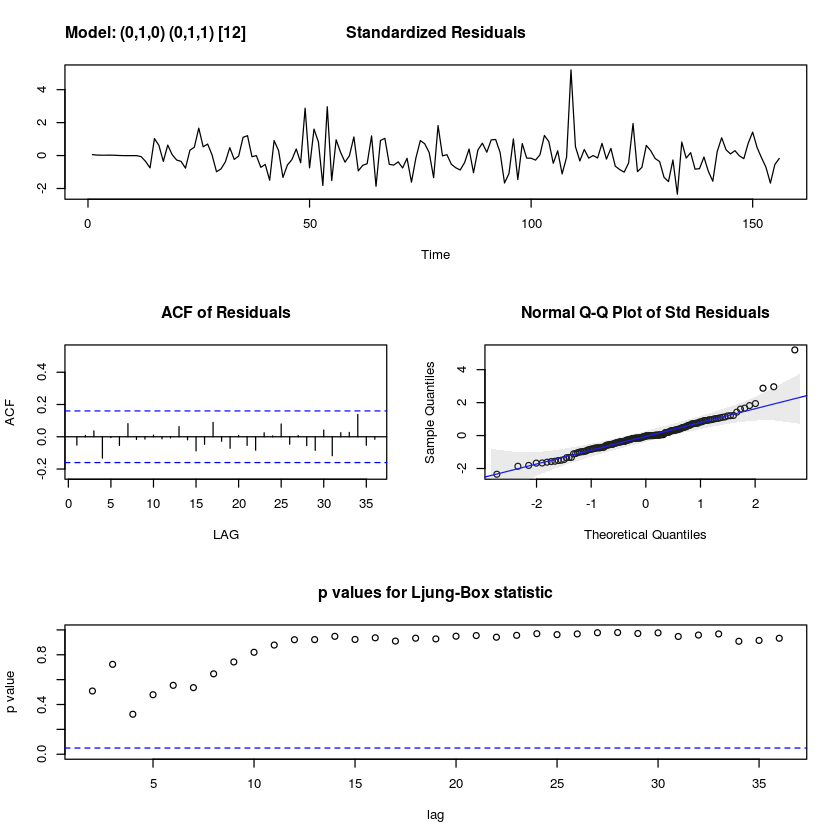

In [2]:
library(astsa)
sarima(Milk, 0,1,0,0,1,1,12)

In [ ]:
library(astsa)
library(forecast)

d=NULL
DD=NULL
d=1
DD=1

per=12
for(p in 1:1){
  for(q in 1:1){
    for(i in 1:3){
      for(j in 1:4){
        if(p+d+q+i+DD+j<=10){
          model<-arima(x=Milk, order = c((p-1),d,(q-1)), seasonal = list(order=c((i-1),DD,(j-1)), period=per))
          pval<-Box.test(model$residuals, lag=log(length(model$residuals)))
          sse<-sum(model$residuals^2)
          cat(p-1,d,q-1,i-1,DD,j-1,per, 'AIC=', model$aic, ' SSE=',sse,' p-VALUE=', pval$p.value,'\n')
        }
      }
    }
  }
}


Attaching package: ‘forecast’

The following object is masked from ‘package:astsa’:

    gas



In [ ]:
model<- arima(x=Milk, order = c(0,1,0), seasonal = list(order=c(0,1,1), period=12))

In [ ]:
plot(forecast(model))

In [6]:
forecast(model)

    Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
157       823.3978 815.8740  830.9216 811.8911  834.9045
158       854.9196 844.2793  865.5598 838.6467  871.1925
159       882.1923 869.1607  895.2239 862.2622  902.1224
160       925.2390 910.1914  940.2866 902.2257  948.2523
161       958.4461 941.6225  975.2698 932.7165  984.1757
162       962.2105 943.7811  980.6399 934.0252  990.3959
163       890.9973 871.0912  910.9033 860.5536  921.4409
164       851.3336 830.0531  872.6140 818.7879  883.8792
165       829.7513 807.1800  852.3226 795.2314  864.2711
166       806.7802 782.9880  830.5725 770.3931  843.1673
167       795.9513 770.9978  820.9048 757.7882  834.1144
168       810.5435 784.4804  836.6066 770.6834  850.4036
169       835.7413 807.8366  863.6460 793.0648  878.4178
170       867.2631 837.6311  896.8950 821.9449  912.5813
171       894.5358 863.2718  925.7998 846.7217  942.3499
172       937.5825 904.7676  970.3974 887.3964  987.7686
173       970.7896 936.4939 100